# Exercise

1. Use famous iris flower dataset from sklearn.datasets to predict flower species using random forest classifier.
2. Measure prediction score using default n_estimators
3. Now fine tune your model by changing number of trees in your classifer and tell me what best score you can get using how many trees

In [298]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

Lets load the iris flower dataset

In [299]:
#Write your Code Here
iris = datasets.load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

## Understand the dataset
1. iris.DESCR > Complete description of dataset
2. iris.data > Data to learn. Each training set is 4 digit array of features. Total 150 training sets
3. iris.feature_names > Array of all 4 feature ['sepal length (cm)','sepal width cm)','petal length (cm)','petal width (cm)']
4. iris.filename > CSV file name
5. iris.target > The classification label. For every training set there is one classification label(0,1,2). Here 0 for setosa, 1 for versicolor and 2 for virginica
6. iris.target_names > the meaning of the features. Its a array >> ['setosa', 'versicolor', 'virginica']
From above details its clear that our data is 'iris.data' and labels are 'iris.target'

Each training example in iris.data is a array of iris.feature_names lets create a dataframe

In [300]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [301]:
print("Feature names\n", iris.feature_names)
print("\nFilename\n", iris.filename)
print("\nTarget\n", iris.target)
print("\nTarget names\n", iris.target_names)

Feature names
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Filename
 /usr/local/lib/python3.7/dist-packages/sklearn/datasets/data/iris.csv

Target
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

Target names
 ['setosa' 'versicolor' 'virginica']


Add the target cilumn to it

In [302]:
#Write your Code Here
df['target'] = iris.target
df.head()

,sepal length,sepal width,petal length,species,target
0,5.1,3.5,0.2,0,0
1,4.9,3.0,0.2,0,0
2,4.7,3.2,0.2,0,0
3,4.6,3.1,0.2,0,0
4,5.0,3.6,0.2,0,0


In [303]:
df = pd.DataFrame({'sepal length':iris.data[:,0],
                   'sepal width':iris.data[:,1],
                   'petal length':iris.data[:,3],
                   'species':iris.target})
df.head()

,sepal length,sepal width,petal length,species
0,5.1,3.5,0.2,0
1,4.9,3.0,0.2,0
2,4.7,3.2,0.2,0
3,4.6,3.1,0.2,0
4,5.0,3.6,0.2,0


Split the dataframe

In [304]:
#Write your Code Here
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
print(X)
print(Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
print("\nlen of X_train is %s" % (len(x_train)))
print("len of X_test is %s" % (len(x_test)))
print("len of y_train is %s" % (len(y_train)))
print("len of y_test is %s" % (len(y_test)))

     sepal length  sepal width  petal length
0             5.1          3.5           0.2
1             4.9          3.0           0.2
2             4.7          3.2           0.2
3             4.6          3.1           0.2
4             5.0          3.6           0.2
..            ...          ...           ...
145           6.7          3.0           2.3
146           6.3          2.5           1.9
147           6.5          3.0           2.0
148           6.2          3.4           2.3
149           5.9          3.0           1.8

[150 rows x 3 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

len of X_train is 120
len of X_test is 30
len of y_train is 120
len of y_test is 30


## Train the model with Random Forest Algorithm

In [305]:
#Write your Code Here
from sklearn.ensemble import RandomForestClassifier
n = RandomForestClassifier()
n.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [306]:
n.score(x_train,y_train)

1.0

In [307]:
n.score(x_test,y_test)

0.9

In [308]:
from sklearn.metrics import accuracy_score
y_pred = n.predict(x_test)
accuracy_score(y_test, y_pred)

0.9

In [309]:
n = RandomForestClassifier(n_estimators=10)
n.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [310]:
n.score(x_train,y_train)

0.9916666666666667

In [311]:
n.score(x_test,y_test)

0.9

In [312]:
#Display the confusion matrix
#Write your Code Here
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  0  0]
 [ 0  9  2]
 [ 0  1  8]]


In [313]:
#Find the test accuracy
#Write your Code Here
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9

In [314]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.82      0.86        11
           2       0.80      0.89      0.84         9

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



Text(24.0, 0.5, 'Truth')

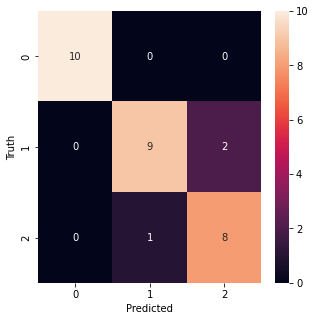

In [315]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(5,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Let try with n_estimators=5

In [316]:
#Write your Code Here
model = RandomForestClassifier(n_estimators = 5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [317]:
model.score(x_test,y_test)

0.9333333333333333